In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets


from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount("/content/drive")
%cd "/content/drive/MyDrive/Colab Notebooks/Self-study/bayes"
%ls  #list directory

train_dataset = np.load("train_dataset.npy")
test_dataset = np.load("test_dataset.npy")
train_labels = np.load("train_labels.npy")
test_labels = np.load("test_labels.npy")

print(f'train_dataset : {train_dataset.shape}')
print(f'test_dataset : {test_dataset.shape}')
print(f'train_labels : {train_labels.shape}')
print(f'test_labels : {test_labels.shape}')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Self-study/bayes
bayes.ipynb         test_labels.npy    train_dataset.npz    train_labels.npy.1
test_dataset.npy    test_labels.npy.1  train_dataset.npz.1  train_labels.npy.2
test_dataset.npz    test_labels.npy.2  train_dataset.npz.2  Tweets.csv
test_dataset.npz.1  train_dataset.npy  train_labels.npy     Tweets.csv.1
train_dataset : (900, 2642)
test_dataset : (100, 2642)
train_labels : (900,)
test_labels : (100,)


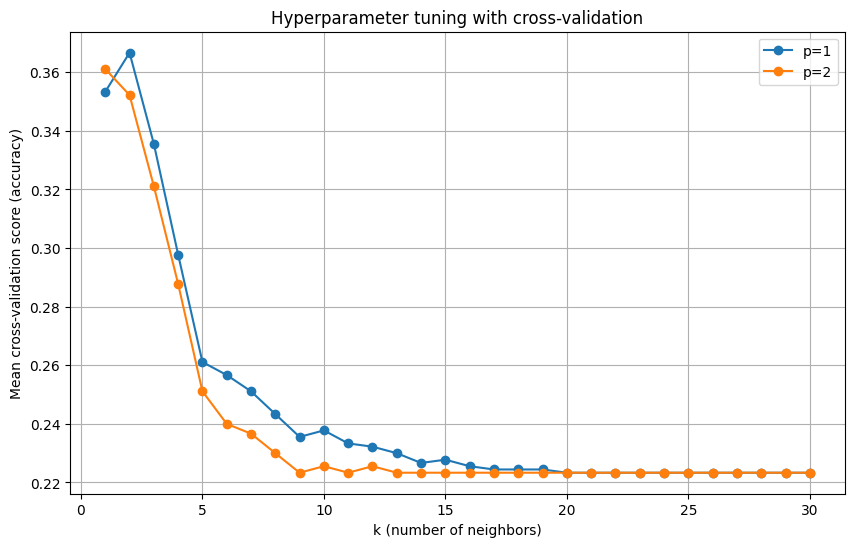

0.3666666666666667
{'n_neighbors': 2, 'p': 1}
KNeighborsClassifier(n_neighbors=2, p=1)


In [ ]:
from sklearn.model_selection import GridSearchCV

#standardization
scaler = StandardScaler()
train_dataset = scaler.fit_transform(train_dataset)
test_dataset = scaler.transform(test_dataset)


# Define the parameter values that should be searched
k_range = list(range(1, 31)) #change this
p_range = list(range(1, 3))  #change this
param_grid = dict(n_neighbors=k_range, p=p_range)

# Create a KNN classifier
knn = KNeighborsClassifier(metric='minkowski')

# Instantiate the grid
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fit the grid with data
grid.fit(train_dataset, train_labels)

# View the complete results
results = grid.cv_results_


#plot
import matplotlib.pyplot as plt
import numpy as np

# Get the mean cross-validation scores
cv_scores_mean = np.array(grid.cv_results_['mean_test_score']).reshape(len(k_range), len(p_range))


plt.figure(figsize=(10, 6))
for idx, p in enumerate(p_range):
    plt.plot(k_range, cv_scores_mean[:, idx], marker='o', label=f'p={p}')

plt.legend()
plt.xlabel('k (number of neighbors)')
plt.ylabel('Mean cross-validation score (accuracy)')
plt.title('Hyperparameter tuning with cross-validation')
plt.grid(True)
plt.show()


# Examine the best model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

Prediction:
 [1 1 1 1 2 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 2 1 0 0 0 1 0 2
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1]
              precision    recall  f1-score   support

           0       0.68      0.29      0.41        52
           1       0.40      0.81      0.54        37
           2       0.33      0.09      0.14        11

    accuracy                           0.46       100
   macro avg       0.47      0.40      0.36       100
weighted avg       0.54      0.46      0.42       100

Confusion Matrix:


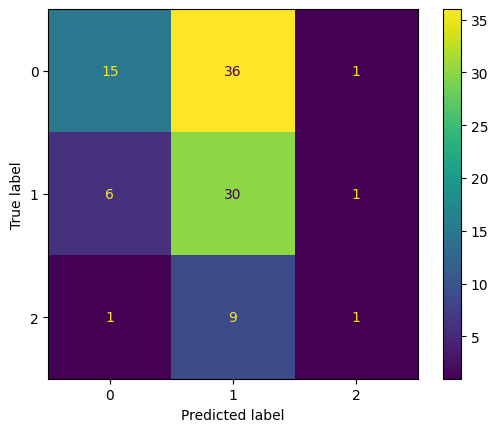

In [ ]:

#Manhattan distance
KNN = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=1)

KNN.fit(train_dataset,train_labels)

pred = KNN.predict(test_dataset)


print("Prediction:\n",pred)

print(classification_report(test_labels, pred))



print("Confusion Matrix:")
cm = confusion_matrix(test_labels, pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()
